load the data set and take insights from plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
Diabetes_data = pd.read_csv('diabetes.csv')
print(Diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Get the number of rows in the DataFrame
no_of_rows = Diabetes_data.shape[0]
no_of_columns = Diabetes_data.shape[1]
print(no_of_rows,no_of_columns)

768 9


Getting the statistical measure of dataset

In [4]:
Diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
Diabetes_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
Diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Taking insights form the dataset

In [7]:
# Extracting each feature as a separate variable
Pregnancies = Diabetes_data['Pregnancies']
Glucose = Diabetes_data['Glucose']
BloodPressure = Diabetes_data['BloodPressure']
SkinThickness = Diabetes_data['SkinThickness']
Insulin = Diabetes_data['Insulin']
BMI = Diabetes_data['BMI']
DiabetesPedigreeFunction = Diabetes_data['DiabetesPedigreeFunction']
Age = Diabetes_data['Age']
Outcome = Diabetes_data['Outcome']


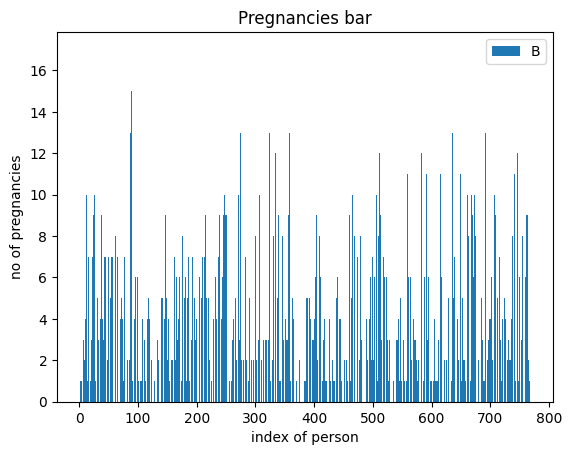

In [8]:
# bar plot of Pregnencies data
Pb = Pregnancies[:]
x_axis = np.arange(1,no_of_rows+1,1)
plt.xlabel('index of person')
plt.ylabel('no of pregnancies')
plt.bar(x_axis,Pb)
plt.title("Pregnancies bar")
plt.legend("Bar")
plt.show()

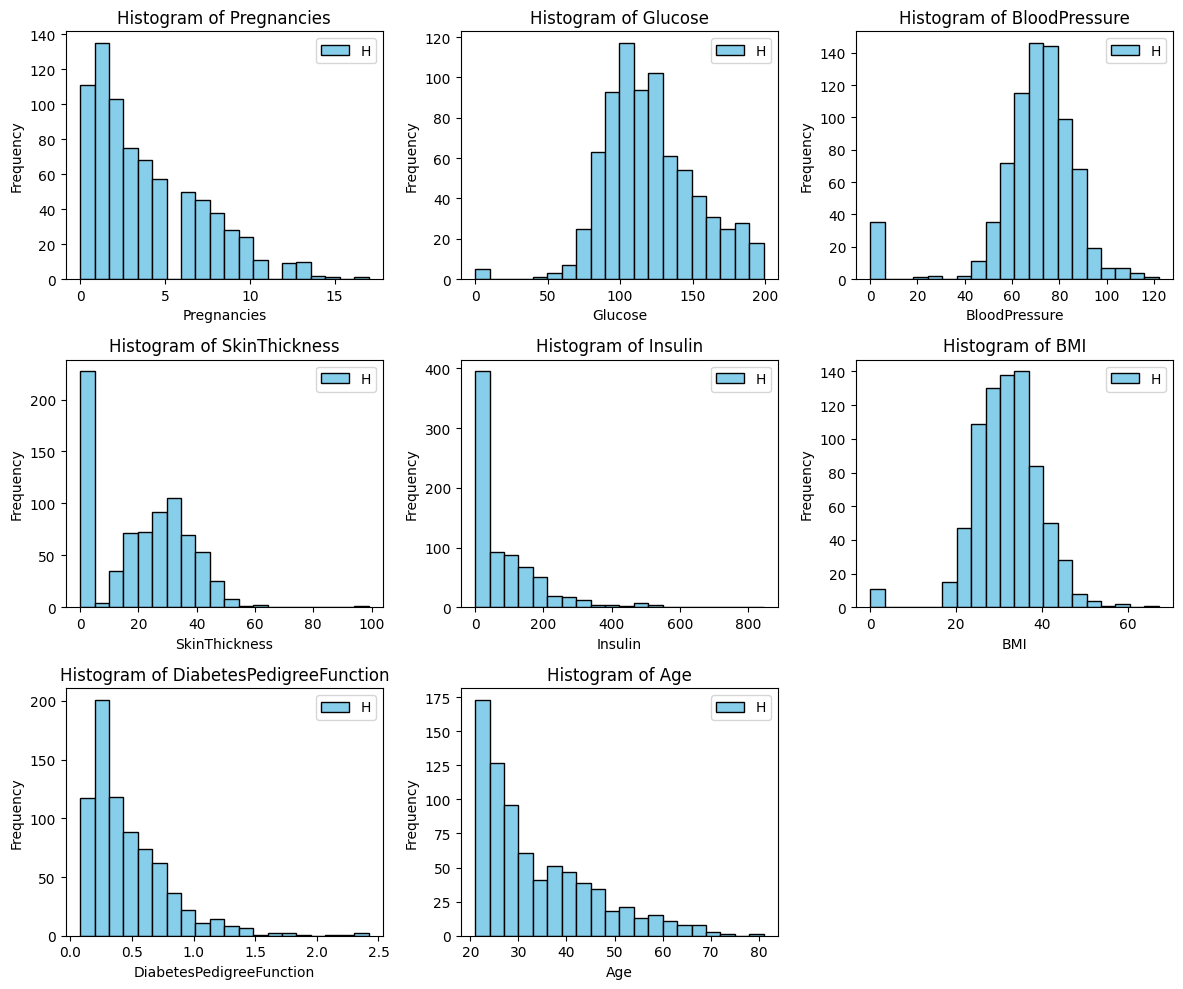

In [9]:
# Plotting Histogram for Pregnancies dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(12, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(3,3,i)
    plt.hist(Diabetes_data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend("Hist...")

plt.tight_layout()
plt.show()

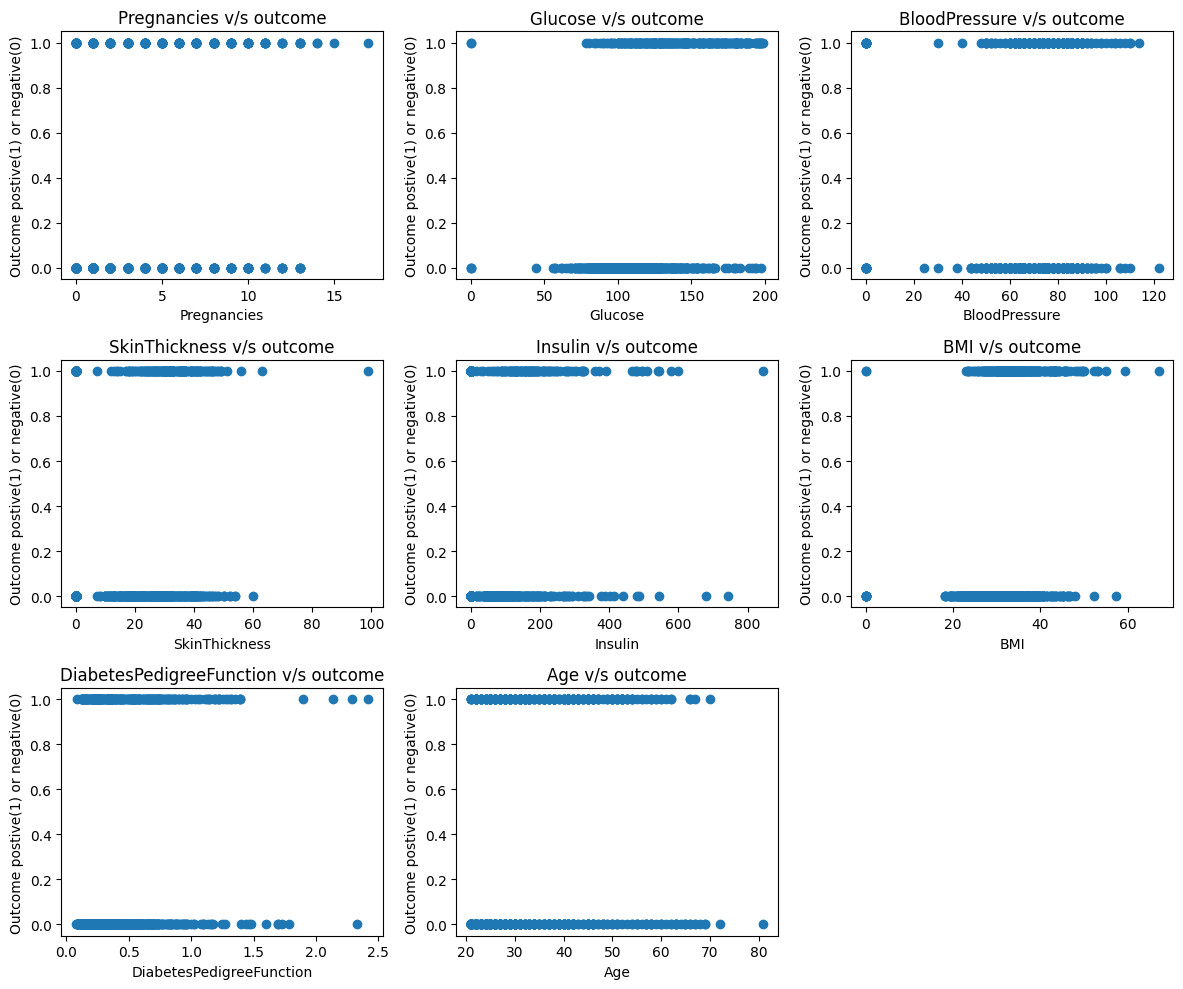

In [10]:
# comparing each feature with the output
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(12,10))
for i, column in enumerate(columns, 1):
    plt.subplot(3,3,i)
    plt.scatter(Diabetes_data[column], Diabetes_data['Outcome'])
    plt.xlabel(f'{column}')
    plt.ylabel('Outcome postive(1) or negative(0)')
    plt.title(f'{column} v/s outcome')

plt.tight_layout()
plt.show()

In [11]:
# Calculating the mean, median and varience of the data.
mean_of_features = []
median_of_features = []
varience_of_features = []

for i, column in enumerate(columns, 1):
    mean = np.mean(Diabetes_data[column])
    mean_of_features.append(mean)
    median = np.median(Diabetes_data[column])
    median_of_features.append(median)
    varience = np.var(Diabetes_data[column])
    varience_of_features.append(varience)

print("mean of features =", [f"{mean:.2f}" for mean in mean_of_features])
print("median of features =", [f"{median:.2f}" for median in median_of_features])
print("varience of features =", [f"{varience:.2f}" for varience in varience_of_features])

mean of features = ['3.85', '120.89', '69.11', '20.54', '79.80', '31.99', '0.47', '33.24']
median of features = ['3.00', '117.00', '72.00', '23.00', '30.50', '32.00', '0.37', '29.00']
varience of features = ['11.34', '1020.92', '374.16', '254.14', '13263.89', '62.08', '0.11', '138.12']


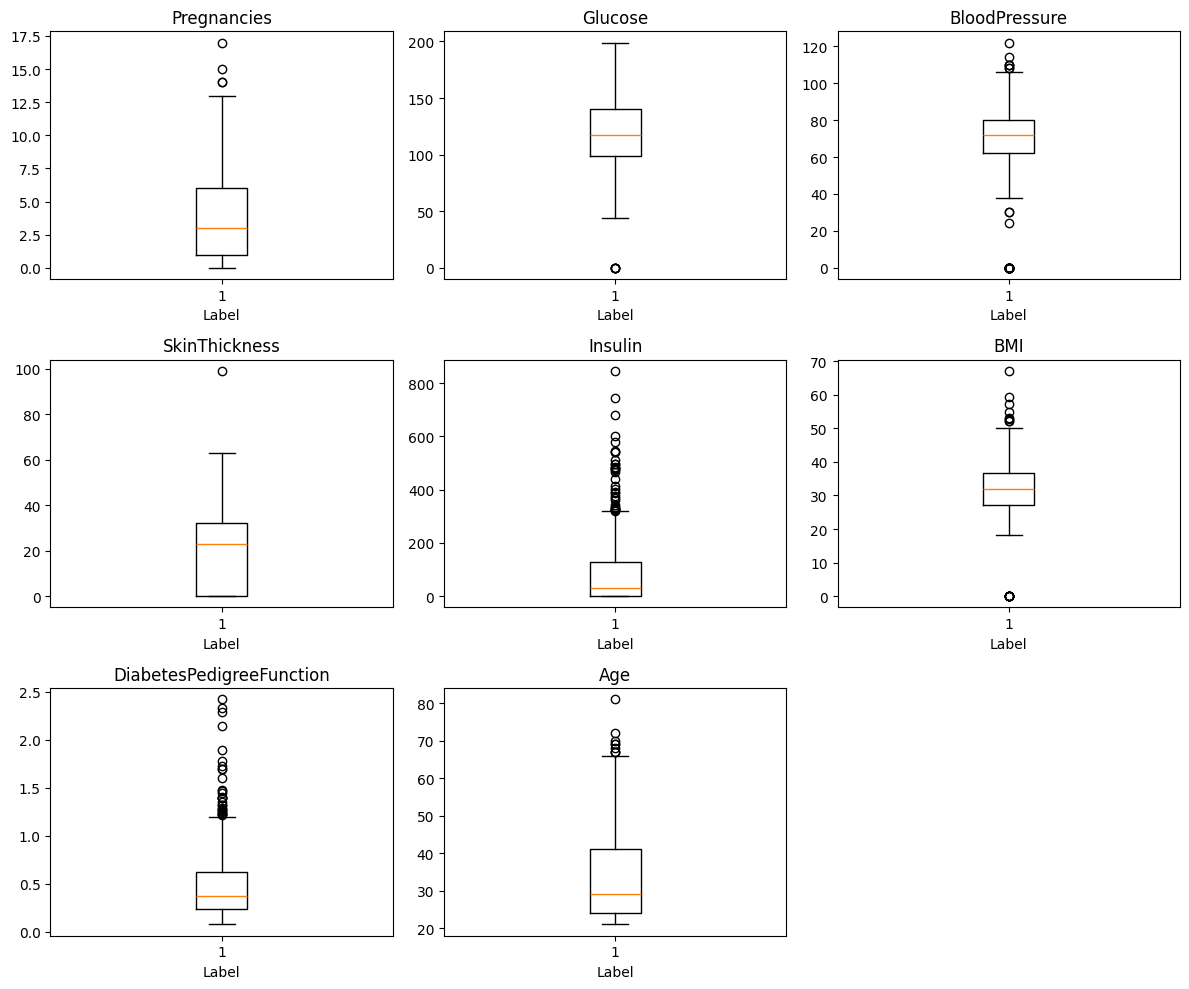

In [12]:
plt.figure(figsize=(12,10))
for i, column in enumerate(columns, 1):
    plt.subplot(3,3,i)
    data = Diabetes_data[column]
    plt.boxplot(data)
    plt.title(f'{column}')
    plt.xlabel('Label')

plt.tight_layout()
plt.show()

In [13]:
Diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [14]:
X = Diabetes_data.drop("Outcome", axis=1)
Y = Diabetes_data["Outcome"]

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled =  scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=23)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(x_test)

In [19]:
model.score(x_test, y_test)

0.7987012987012987

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
print("Accuracy :", accuracy_score(y_test, y_pred))
print("recall", recall_score(y_test, y_pred))
print("precision", precision_score(y_test, y_pred))

Accuracy : 0.7987012987012987
recall 0.6415094339622641
precision 0.7391304347826086


In [21]:
mat = confusion_matrix(y_test, y_pred)

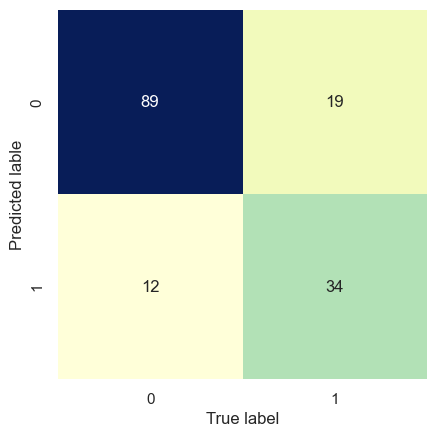

In [22]:
import seaborn as sns
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted lable")
plt.show()

In [24]:
import pickle

# Save the trained model
pickle.dump(model, open('diabetes_model.pkl', 'wb'))

# Save the fitted scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))